# 1. Load the data
### Data download

The dataset we chose is the EMNIST dataset. We downloaded the data and upzipped it and put the directory in the same level with this file. The details can be found in the appendix of the report. 

### Data description

**1. emnist_train.pkl**: This file contains the training data and labels for the EMNIST dataset. It stores a dictionary with two keys, 'data' and 'labels':
	- 'data': A numpy array with the shape (100000, 1, 28, 28), representing 100,000 grayscale images of size 28x28 pixels. 
	- 'labels': A numpy array with the shape (100000,), containing the corresponding class labels for the training images. The labels are integers in the range of [0, 61], representing the 62 classes in the EMNIST by_class dataset.
 
**2. emnist_test.pkl**: This file contains the test data and labels for the EMNIST dataset. It stores a dictionary with two keys, 'data' and 'labels':
	- 'data': A numpy array with the shape (20000, 1, 28, 28), representing 20,000 grayscale images of size 28x28 pixels.
	- 'labels': A numpy array with the shape (20000,), containing the corresponding class labels for the test images. The labels are integers in the range of [0, 61], representing the 62 classes in the EMNIST by_class dataset.   



### Retrive the data
Using pickle to retrieve the .pkl dataset

In [1]:
import pickle
import numpy as np

F = open('emnist_train.pkl','rb')
train_dataset = pickle.load(F)

F=open('emnist_test.pkl','rb')
test_dataset = pickle.load(F)

In [2]:
# the data from the emnist_train.pkl
X_train = np.array(train_dataset["data"])
# the label (class) from the emnist_train.pkl
y_train = np.array(train_dataset["labels"])
# the data from the emnist_test.pkl
X_test = np.array(test_dataset["data"])
# the label (class) from the emnist_test.pkl
y_test = np.array(test_dataset["labels"])


# prepare two more y_train for the validation split
y_train_Lenet = np.array(train_dataset["labels"])
y_train_mlp = np.array(train_dataset["labels"])

# inspect the shape for preprocessing
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(100000, 28, 28)
(20000, 28, 28)
(100000,)
(20000,)


# 2. Preprocessing

In [75]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import time
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler

NOTE: Using the MinMax scaler is the same as divide them by 255 because all of the values are in the range of 0~255. 

In [76]:
# Normalization: Scale the data to the range 0-1
X_train = X_train / 255
X_test= X_test /255

### Preprocess for the VGG

In this fragment, process the data from (28, 28) to (32, 32, 3). 

From keras.io:
input_shape: optional shape tuple, only to be specified if include_top is False (otherwise the input shape has to be (224, 224, 3) (with channels_last data format) or (3, 224, 224) (with channels_first data format). It should have exactly 3 input channels, and width and height should be no smaller than 32. E.g. (200, 200, 3) would be one valid value.

In [77]:
import numpy as np
from skimage import transform


# Create an empty numpy array to store the RGB images
X_train_VGG = np.empty((100000, 32, 32, 3))

# Loop over the grayscale images and resize them to 32x32 RGB images
for i in range(100000):
    grey_RGB = np.expand_dims(X_train[i], axis=2)
    X_train_VGG[i] = transform.resize(grey_RGB, (32, 32, 3))

print(X_train_VGG.shape)

# Same for the test data
X_test_VGG = np.empty((20000, 32, 32, 3))

for i in range(20000):
    grey_RGB = np.expand_dims(X_test[i], axis=2)
    X_test_VGG[i] = transform.resize(grey_RGB, (32, 32, 3))

print(X_test_VGG.shape)

(100000, 32, 32, 3)
(20000, 32, 32, 3)


### Preprocess for the Lenet-5
In this fragment, process the data from (28, 28) to (32, 32, 1). Similar to what happened to VGG. 


In [78]:
import numpy as np
from skimage import transform


# Create an empty numpy array to store result
X_train_Lenet = np.empty((100000, 32, 32, 1))

# Loop over the grayscale images and resize them to 32x32x1 images
for i in range(100000):
    grey_RGB = np.expand_dims(X_train[i], axis=2)
    X_train_Lenet[i] = transform.resize(grey_RGB, (32, 32, 1))

print(X_train_Lenet.shape)

# Same for the test data
X_test_Lenet = np.empty((20000, 32, 32, 1))

for i in range(20000):
    grey_RGB = np.expand_dims(X_test[i], axis=2)
    X_test_Lenet[i] = transform.resize(grey_RGB, (32, 32, 1))
    
print(X_test_Lenet.shape)

(100000, 32, 32, 1)
(20000, 32, 32, 1)


### Create validation data for VGG16

In [79]:
# Create validation set from the training set for VGG16
X_train_VGG, X_valid_VGG, y_train_VGG, y_valid_VGG = train_test_split(X_train_VGG, y_train, train_size = 0.9)
print(f"The data shape for VGG16 is: ", X_train_VGG.shape)


The data shape for VGG16 is:  (90000, 32, 32, 3)


### Create validation data for Lenet-5

In [80]:
# Create validation set from the training set for Lenet-5
X_train_Lenet, X_valid_Lenet, y_train_Lenet, y_valid_Lenet = train_test_split(X_train_Lenet, 
                                                                              y_train_Lenet, train_size = 0.9)
print(f"The data shape for Lenet-5 is: ", X_train_Lenet.shape)

The data shape for Lenet-5 is:  (90000, 32, 32, 1)


### Create validation data for mlp

In [81]:
X_train_mlp, X_valid_mlp, y_train_mlp, y_valid_mlp = train_test_split(X_train, 
                                                                      y_train, train_size=0.9)

print(f"The data shape for Multilater perceptron is: ", X_train_mlp.shape)

The data shape for Multilater perceptron is:  (90000, 28, 28)


# 3. Model Usage

Tensorflow version is:  2.12.0


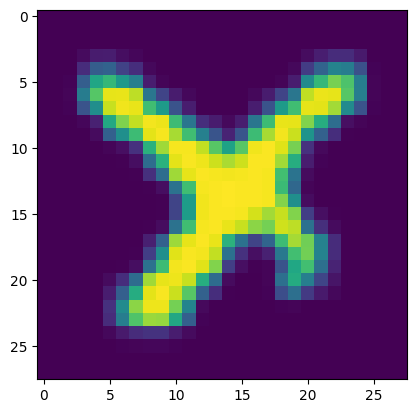

In [82]:
# Import our deep learning libraries which were installed last week
import tensorflow as tf
print(f"Tensorflow version is: ", tf.__version__)

from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

#Display a random image
plt.imshow(X_train[4])
plt.show
# Make the notebook's output stable across runs
np.random.seed(5318)
tf.random.set_seed(531)
keras.backend.clear_session() 

## Convolutional Neural Networks

The EMNIST dataset consists of handwritten digits and letters, which can be treated as images. CNNs are designed to handle images and can learn and extract features automatically, which is essential for image classification tasks.

In this assignment, we are going to use **two** pre-defined CNN.
Here are the model description:
1. VGG16
2. Lenet-5

Here are the layers that are used in these models:
* Convolutional Layer
* MaxPooling layer
* Flatten Layer
* Dense Layer

The use of these layers will be explained in the report. 

### 1. VGG16

VGG is a powerful predefined convolutional neural network. It replaces large kernel-sized filters with 11 and 5 in the first and second layer respectively showed the improvement over AlexNet architecture, with multiple 3×3 kernel-sized filters one after another. 

In [83]:
from tensorflow import keras
from keras.models import Sequential
from keras import losses
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten, BatchNormalization
# build the model
def create_vgg(): 
    model_vgg = Sequential()

    # total of 13 convolutional layers and 3 fully conected layers
    model_vgg.add(Conv2D(input_shape=(32,32,3), filters=16,kernel_size=(3,3),padding="same", activation="relu"))
    model_vgg.add(BatchNormalization())
    model_vgg.add(Conv2D(filters=16,kernel_size=(3,3),padding="same", activation="relu"))
    model_vgg.add(BatchNormalization())
    model_vgg.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

    model_vgg.add(Conv2D(filters=32,kernel_size=(3,3),padding="same", activation="relu"))
    model_vgg.add(BatchNormalization())
    model_vgg.add(Conv2D(filters=32,kernel_size=(3,3),padding="same", activation="relu"))
    model_vgg.add(BatchNormalization())
    model_vgg.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

    model_vgg.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
    model_vgg.add(BatchNormalization())
    model_vgg.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
    model_vgg.add(BatchNormalization())
    model_vgg.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
    model_vgg.add(BatchNormalization())
    model_vgg.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

    model_vgg.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
    model_vgg.add(BatchNormalization())
    model_vgg.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
    model_vgg.add(BatchNormalization())
    model_vgg.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
    model_vgg.add(BatchNormalization())
    model_vgg.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

    model_vgg.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model_vgg.add(BatchNormalization())
    model_vgg.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model_vgg.add(BatchNormalization())
    model_vgg.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model_vgg.add(BatchNormalization())
    model_vgg.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))


    model_vgg.add(Flatten())
    model_vgg.add(Dense(512,activation="relu"))
    model_vgg.add(Dense(512,activation="relu"))
    model_vgg.add(Dense(62, activation="softmax")) 

    ##units are 1 because we are using binary activation

    # Because the weights are pretrained from the Imagenet
    #for layer in model.layers:
    #     layer.trainable = False


    # Compile model with loss, optimiser and metrics
#    model_vgg.compile(optimizer = 'adam', 
#                       loss = losses.sparse_categorical_crossentropy, 
#                       metrics=['accuracy'])
    return model_vgg

create_vgg().summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 16)       64        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 16)        2320      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 16)       64        
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                        

### VGG16 with parameter tuning

In [86]:
from scikeras.wrappers import KerasClassifier

# Create a KerasClassifier object which works with sklearn grid searches
# We need to pass default values of arguments in build_mlp if we wish to tune them
keras_classifier_vgg = KerasClassifier(create_vgg,
                                   optimizer="adam",
                                   metrics=["accuracy"],
                                   loss="sparse_categorical_crossentropy",
                                   batch_size=128,
                                   epochs=10
                                  )
from sklearn.model_selection import GridSearchCV

param_grid = {
    "optimizer" : ["sgd","adam"],
    "batch_size" : [32, 128],
}

grid_search_cv_vgg = GridSearchCV(keras_classifier_vgg, param_grid, cv=3, verbose=2)
grid_search_cv_vgg.fit(X_train_VGG, y_train_VGG)

print(grid_search_cv_vgg.best_params_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Epoch 1/10
1875/1875 [==============================] - 27s 12ms/step - loss: 0.8488 - accuracy: 0.7411
Epoch 2/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.4878 - accuracy: 0.8270
Epoch 3/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.4235 - accuracy: 0.8436
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3837 - accuracy: 0.8557
Epoch 5/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3543 - accuracy: 0.8659
Epoch 6/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3325 - accuracy: 0.8716
Epoch 7/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3144 - accuracy: 0.8770
Epoch 8/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.3009 - accuracy: 0.8829
Epoch 9/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2846 - accuracy: 0.8880
Epoch

In [87]:
# Evaluate the classifier on the test data.
best_model_vgg = grid_search_cv_vgg.best_estimator_


accuracy = best_model_vgg.score(X_test_VGG, y_test)
print(f"Accuracy on test data: {accuracy:.4f}")

625/625 [==============================] - 2s 3ms/step
Accuracy on test data: 0.8580


### 2. Lenet-5

In [88]:
from tensorflow.keras import layers, models, losses, Model, Sequential
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from keras.optimizers import SGD

datagen = ImageDataGenerator(rotation_range=15, width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.1)
datagen.fit(X_train_Lenet)
def Lenet():

    model_lenet = models.Sequential()

    model_lenet.add(layers.Conv2D(6, (5, 5), activation='tanh', input_shape=(32,32,1), kernel_regularizer=l2(0.01)))
    model_lenet.add(layers.MaxPooling2D(2,2))
    model_lenet.add(layers.BatchNormalization())
    model_lenet.add(layers.Dropout(0.2))

    model_lenet.add(layers.Conv2D(16, (5, 5), activation='tanh', kernel_regularizer=l2(0.01)))
    model_lenet.add(layers.MaxPooling2D(2,2))
    model_lenet.add(layers.BatchNormalization())
    model_lenet.add(layers.Dropout(0.2))

    model_lenet.add(layers.Flatten())

    model_lenet.add(layers.Dense(120, activation='tanh'))
    model_lenet.add(layers.Dense(84, activation='tanh'))
    model_lenet.add(layers.Dense(62, activation='softmax'))


    opt = 'adam'

    model_lenet.compile(optimizer=opt,loss="sparse_categorical_crossentropy",metrics=["accuracy"])
    return model_lenet

model_lenet = Lenet()
model_lenet.summary()


Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_182 (Conv2D)         (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d_70 (MaxPoolin  (None, 14, 14, 6)        0         
 g2D)                                                            
                                                                 
 batch_normalization_182 (Ba  (None, 14, 14, 6)        24        
 tchNormalization)                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 6)         0         
                                                                 
 conv2d_183 (Conv2D)         (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_71 (MaxPoolin  (None, 5, 5, 16)       

### Lenet-5

In [89]:
# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, min_lr=1e-6)
mc = ModelCheckpoint('Best_points.h5', monitor='val_accuracy', mode = 'max', verbose=1, save_best_only=True, patience=100)
batch_size = 128
epochs = 100
steps_per_epoch = X_train_Lenet.shape[0] // batch_size
validation_steps = X_valid_Lenet.shape[0] // batch_size
history = model_lenet.fit(X_train_Lenet, y_train_Lenet, 
                         batch_size = batch_size, 
                         epochs = epochs, 
                         validation_data = (X_valid_Lenet, y_valid_Lenet),
                         steps_per_epoch = steps_per_epoch,
                         validation_steps = validation_steps, verbose = 1,
                          callbacks=[mc,reduce_lr,early_stopping])



Epoch 1/100
702/703 [============================>.] - ETA: 0s - loss: 1.3016 - accuracy: 0.6638
Epoch 1: val_accuracy improved from -inf to 0.48377, saving model to Best_points.h5
703/703 [==============================] - 9s 9ms/step - loss: 1.3008 - accuracy: 0.6639 - val_loss: 1.9700 - val_accuracy: 0.4838 - lr: 0.0010
Epoch 2/100
700/703 [============================>.] - ETA: 0s - loss: 0.7140 - accuracy: 0.7825
Epoch 2: val_accuracy improved from 0.48377 to 0.68490, saving model to Best_points.h5
703/703 [==============================] - 6s 8ms/step - loss: 0.7137 - accuracy: 0.7826 - val_loss: 1.1034 - val_accuracy: 0.6849 - lr: 0.0010
Epoch 3/100
697/703 [============================>.] - ETA: 0s - loss: 0.6237 - accuracy: 0.8048
Epoch 3: val_accuracy improved from 0.68490 to 0.78626, saving model to Best_points.h5
703/703 [==============================] - 5s 7ms/step - loss: 0.6237 - accuracy: 0.8048 - val_loss: 0.6647 - val_accuracy: 0.7863 - lr: 0.0010
Epoch 4/100
695/703

In [90]:
# Evaluate the classifier on the test data.
from tensorflow.keras.models import load_model
best_model_lenet = load_model('Best_points.h5')
loss, accuracy = best_model_lenet.evaluate(X_test_Lenet, y_test)
print(f"Accuracy on test data: {accuracy:.4f}")

625/625 [==============================] - 2s 2ms/step - loss: 0.4324 - accuracy: 0.8522
Accuracy on test data: 0.8522


### 3. Multilayer Perceptron

In [91]:
def build_mlp(
    n_hidden_layers=2, n_hidden_neurons=50,
    activation_function="relu", input_shape=[28,28]
):
    model = keras.models.Sequential()
    # Add the input layer
    model.add(keras.layers.Flatten(input_shape=input_shape))

    # Add the hidden layers with desired size and activation function
    for layer in range(n_hidden_layers):
        model.add(keras.layers.Dense(n_hidden_neurons, activation=activation_function))
        
    # Add the output layer for 62 class classification
    model.add(keras.layers.Dense(62, activation="softmax"))
    
    return model

Due to the runnng time extremly long, we separate the tunning step. The first step to find the appropriate optimizer and the learning rate

In [92]:
from scikeras.wrappers import KerasClassifier

# Create a KerasClassifier object which works with sklearn grid searches
# We need to pass default values of arguments in build_mlp if we wish to tune them
keras_classifier = KerasClassifier(build_mlp,
                                   n_hidden_layers=2,
                                   n_hidden_neurons=50,
                                   activation_function="relu",
                                   loss="sparse_categorical_crossentropy",
                                   optimizer="sgd",
                                   optimizer__learning_rate=0.01,
                                   metrics=["accuracy"]
                                  )
from sklearn.model_selection import GridSearchCV

param_grid = {
    #"n_hidden_neurons": [100, 200],
    "optimizer" : ["sgd","Adam"],
    "optimizer__learning_rate": [0.01, 0.001, 0.0001],
    #"activation_function": ["relu", "sigmoid", "tanh"]
}

grid_search_cv = GridSearchCV(keras_classifier, param_grid, cv=3, verbose=2)
grid_search_cv.fit(X_train_mlp, y_train_mlp, epochs=20)

print(grid_search_cv.best_params_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 2.5141 - accuracy: 0.4166
Epoch 2/20
1875/1875 [==============================] - 5s 2ms/step - loss: 1.4611 - accuracy: 0.6095
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 1.2385 - accuracy: 0.6530
Epoch 4/20
1875/1875 [==============================] - 5s 2ms/step - loss: 1.1293 - accuracy: 0.6788
Epoch 5/20
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0567 - accuracy: 0.6960
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0009 - accuracy: 0.7085
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.9578 - accuracy: 0.7197
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.9200 - accuracy: 0.7293
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8890 - accuracy: 0.7360
Epoch 10/20
1875/1875 

The second step to find the appropriate size for "n_hidden_neurons"

In [93]:
from scikeras.wrappers import KerasClassifier

# Create a KerasClassifier object which works with sklearn grid searches
# We need to pass default values of arguments in build_mlp if we wish to tune them
keras_classifier = KerasClassifier(build_mlp,
                                   n_hidden_layers=2,
                                   n_hidden_neurons=50,
                                   activation_function="relu",
                                   loss="sparse_categorical_crossentropy",
                                   optimizer="Adam",
                                   optimizer__learning_rate=0.001,
                                   metrics=["accuracy"]
                                  )
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_hidden_neurons": [100, 200],
    #"activation_function": ["relu", "sigmoid", "tanh"]
}

grid_search_cv = GridSearchCV(keras_classifier, param_grid, cv=3, verbose=2)
grid_search_cv.fit(X_train_mlp, y_train_mlp, epochs=20)
print(grid_search_cv.best_params_)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.1821 - accuracy: 0.6693
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7411 - accuracy: 0.7657
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6459 - accuracy: 0.7895
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5852 - accuracy: 0.8037
Epoch 5/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5487 - accuracy: 0.8131
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5147 - accuracy: 0.8218
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4890 - accuracy: 0.8281
Epoch 8/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4705 - accuracy: 0.8333
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4499 - accuracy: 0.8365
Epoch 10/20
1875/1875 [

The last step is to find the appropriate size activation function

In [94]:
from scikeras.wrappers import KerasClassifier

# Create a KerasClassifier object which works with sklearn grid searches
# We need to pass default values of arguments in build_mlp if we wish to tune them
keras_classifier = KerasClassifier(build_mlp,
                                   n_hidden_layers=2,
                                   n_hidden_neurons=200,
                                   activation_function="relu",
                                   loss="sparse_categorical_crossentropy",
                                   optimizer="Adam",
                                   optimizer__learning_rate=0.001,
                                   metrics=["accuracy"]
                                  )
from sklearn.model_selection import GridSearchCV

param_grid = {
    "activation_function": ["relu", "sigmoid", "tanh"]
}

grid_search_cv = GridSearchCV(keras_classifier, param_grid, cv=3, verbose=2)
grid_search_cv.fit(X_train_mlp, y_train_mlp, epochs=20)
print(grid_search_cv.best_params_)
best_model_mlp = grid_search_cv.best_estimator_

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0397 - accuracy: 0.6995
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6497 - accuracy: 0.7863
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5604 - accuracy: 0.8089
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5017 - accuracy: 0.8233
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4621 - accuracy: 0.8349
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4267 - accuracy: 0.8453
Epoch 7/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3949 - accuracy: 0.8534
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3733 - accuracy: 0.8609
Epoch 9/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3525 - accuracy: 0.8652
Epoch 10/20
1875/1875 [

In [95]:
best_model_mlp = grid_search_cv.best_estimator_


accuracy = best_model_mlp.score(X_test, y_test)
print(f"Accuracy on test data: {accuracy:.4f}")

625/625 [==============================] - 1s 1ms/step
Accuracy on test data: 0.8123


# 4. Evaluation of different CNN models And MLP

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score
from scipy.special import softmax
from itertools import cycle

Class: 0 Count: 976
Class: 1 Count: 1023
Class: 2 Count: 1003
Class: 3 Count: 1035
Class: 4 Count: 903
Class: 5 Count: 928
Class: 6 Count: 959
Class: 7 Count: 1098
Class: 8 Count: 941
Class: 9 Count: 929
Class: 10 Count: 170
Class: 11 Count: 118
Class: 12 Count: 316
Class: 13 Count: 128
Class: 14 Count: 162
Class: 15 Count: 261
Class: 16 Count: 60
Class: 17 Count: 74
Class: 18 Count: 350
Class: 19 Count: 95
Class: 20 Count: 71
Class: 21 Count: 141
Class: 22 Count: 273
Class: 23 Count: 249
Class: 24 Count: 741
Class: 25 Count: 277
Class: 26 Count: 67
Class: 27 Count: 160
Class: 28 Count: 624
Class: 29 Count: 249
Class: 30 Count: 342
Class: 31 Count: 126
Class: 32 Count: 125
Class: 33 Count: 85
Class: 34 Count: 141
Class: 35 Count: 62
Class: 36 Count: 278
Class: 37 Count: 170
Class: 38 Count: 90
Class: 39 Count: 297
Class: 40 Count: 709
Class: 41 Count: 57
Class: 42 Count: 97
Class: 43 Count: 269
Class: 44 Count: 76
Class: 45 Count: 60
Class: 46 Count: 83
Class: 47 Count: 421
Class: 48 C

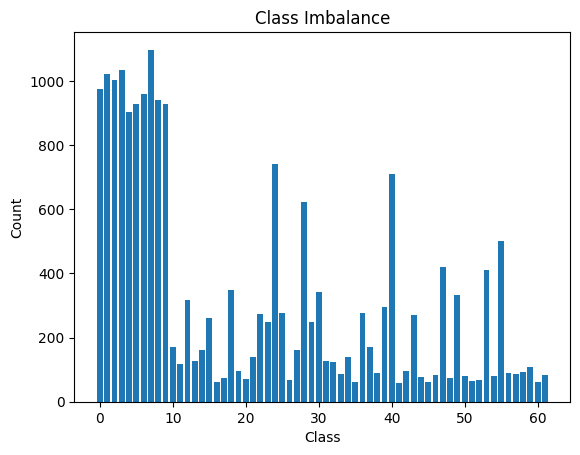

In [97]:
# Pre-evaluating: Checking for Class Imbalance
unique_values, counts = np.unique(y_test, return_counts=True)

for value, count in zip(unique_values, counts):
    print("Class:", value, "Count:", count)

plt.bar(unique_values, counts)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Imbalance')
plt.show()


## 1.Metics

In [98]:
def plot_metrics(y_true, y_pred):
    """
    Args:
        y_true (array-like): True labels of the data.
        y_pred (array-like): Predicted labels of the data.
    """
    # Compute metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    # Print metrics
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')

    # Plot metrics
    labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
    values = [accuracy, precision, recall, f1]

    colors = ['blue', 'green', 'orange', 'red']

    fig, ax = plt.subplots()
    ax.bar(labels, values, color=colors)
    plt.ylim([0, 1])
    plt.title('Classifier Metrics')
    plt.ylabel('Score')
    plt.show()


### 1.VGG

625/625 [==============================] - 2s 3ms/step
Accuracy: 0.85805
Precision: 0.8427623889257622
Recall: 0.85805
F1 Score: 0.8413054816096094


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


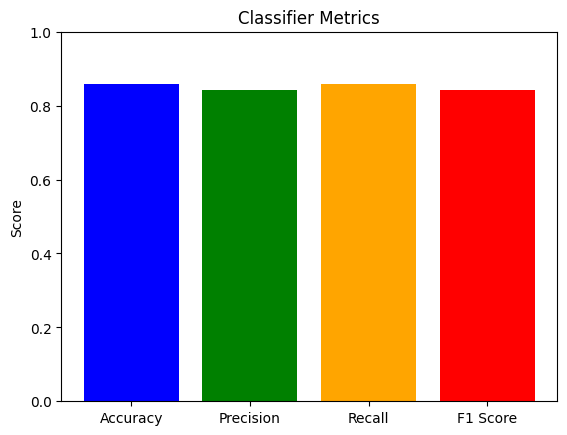

In [99]:
VGG_pred = best_model_vgg.predict(X_test_VGG)
plot_metrics(y_test, VGG_pred)


### 2.Lenet-5

625/625 [==============================] - 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.8522
Precision: 0.8426983082240593
Recall: 0.8522
F1 Score: 0.8375304069231393


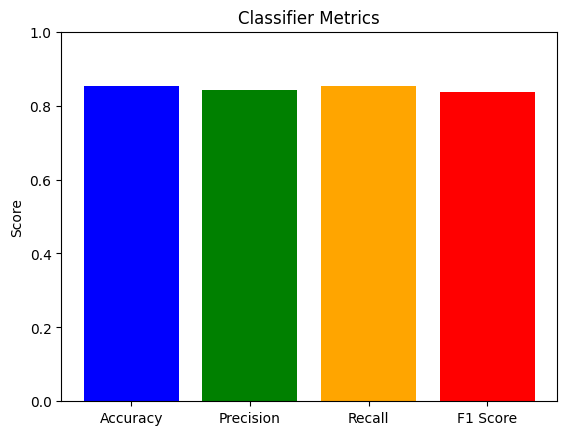

In [100]:
lenet_pred = best_model_lenet.predict(X_test_Lenet)
predicted_labels_lenet = np.argmax(lenet_pred, axis=1)
plot_metrics(y_test, predicted_labels_lenet)

### 3.MLP

625/625 [==============================] - 1s 2ms/step
Accuracy: 0.81225
Precision: 0.8003825104443254
Recall: 0.81225
F1 Score: 0.8005661343655879


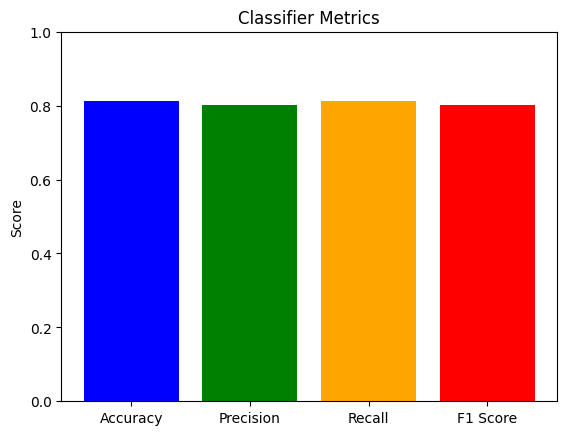

In [101]:
mlp_pred = best_model_mlp.predict(X_test)
plot_metrics(y_test, mlp_pred)

## 2.The confusion matrixs


In [102]:
def plot_confusion_matrix(y_true, y_pred):
    """
    Args:
        y_true (array-like): True labels of the data.
        y_pred (array-like): Predicted labels of the data.
    """
    cm = confusion_matrix(y_true, y_pred)
    
    # Create a figure and axis
    plt.figure(figsize=(62, 62))
    ax = plt.gca()
    
    # Plot the confusion matrix using a heatmap
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False, ax=ax)
    
    # Set labels, title, and ticks
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(range(62), rotation='vertical')
    ax.yaxis.set_ticklabels(range(62), rotation='horizontal')
    
    # Ensure the plot is shown correctly
    plt.tight_layout()
    plt.show()

### 1. VGG

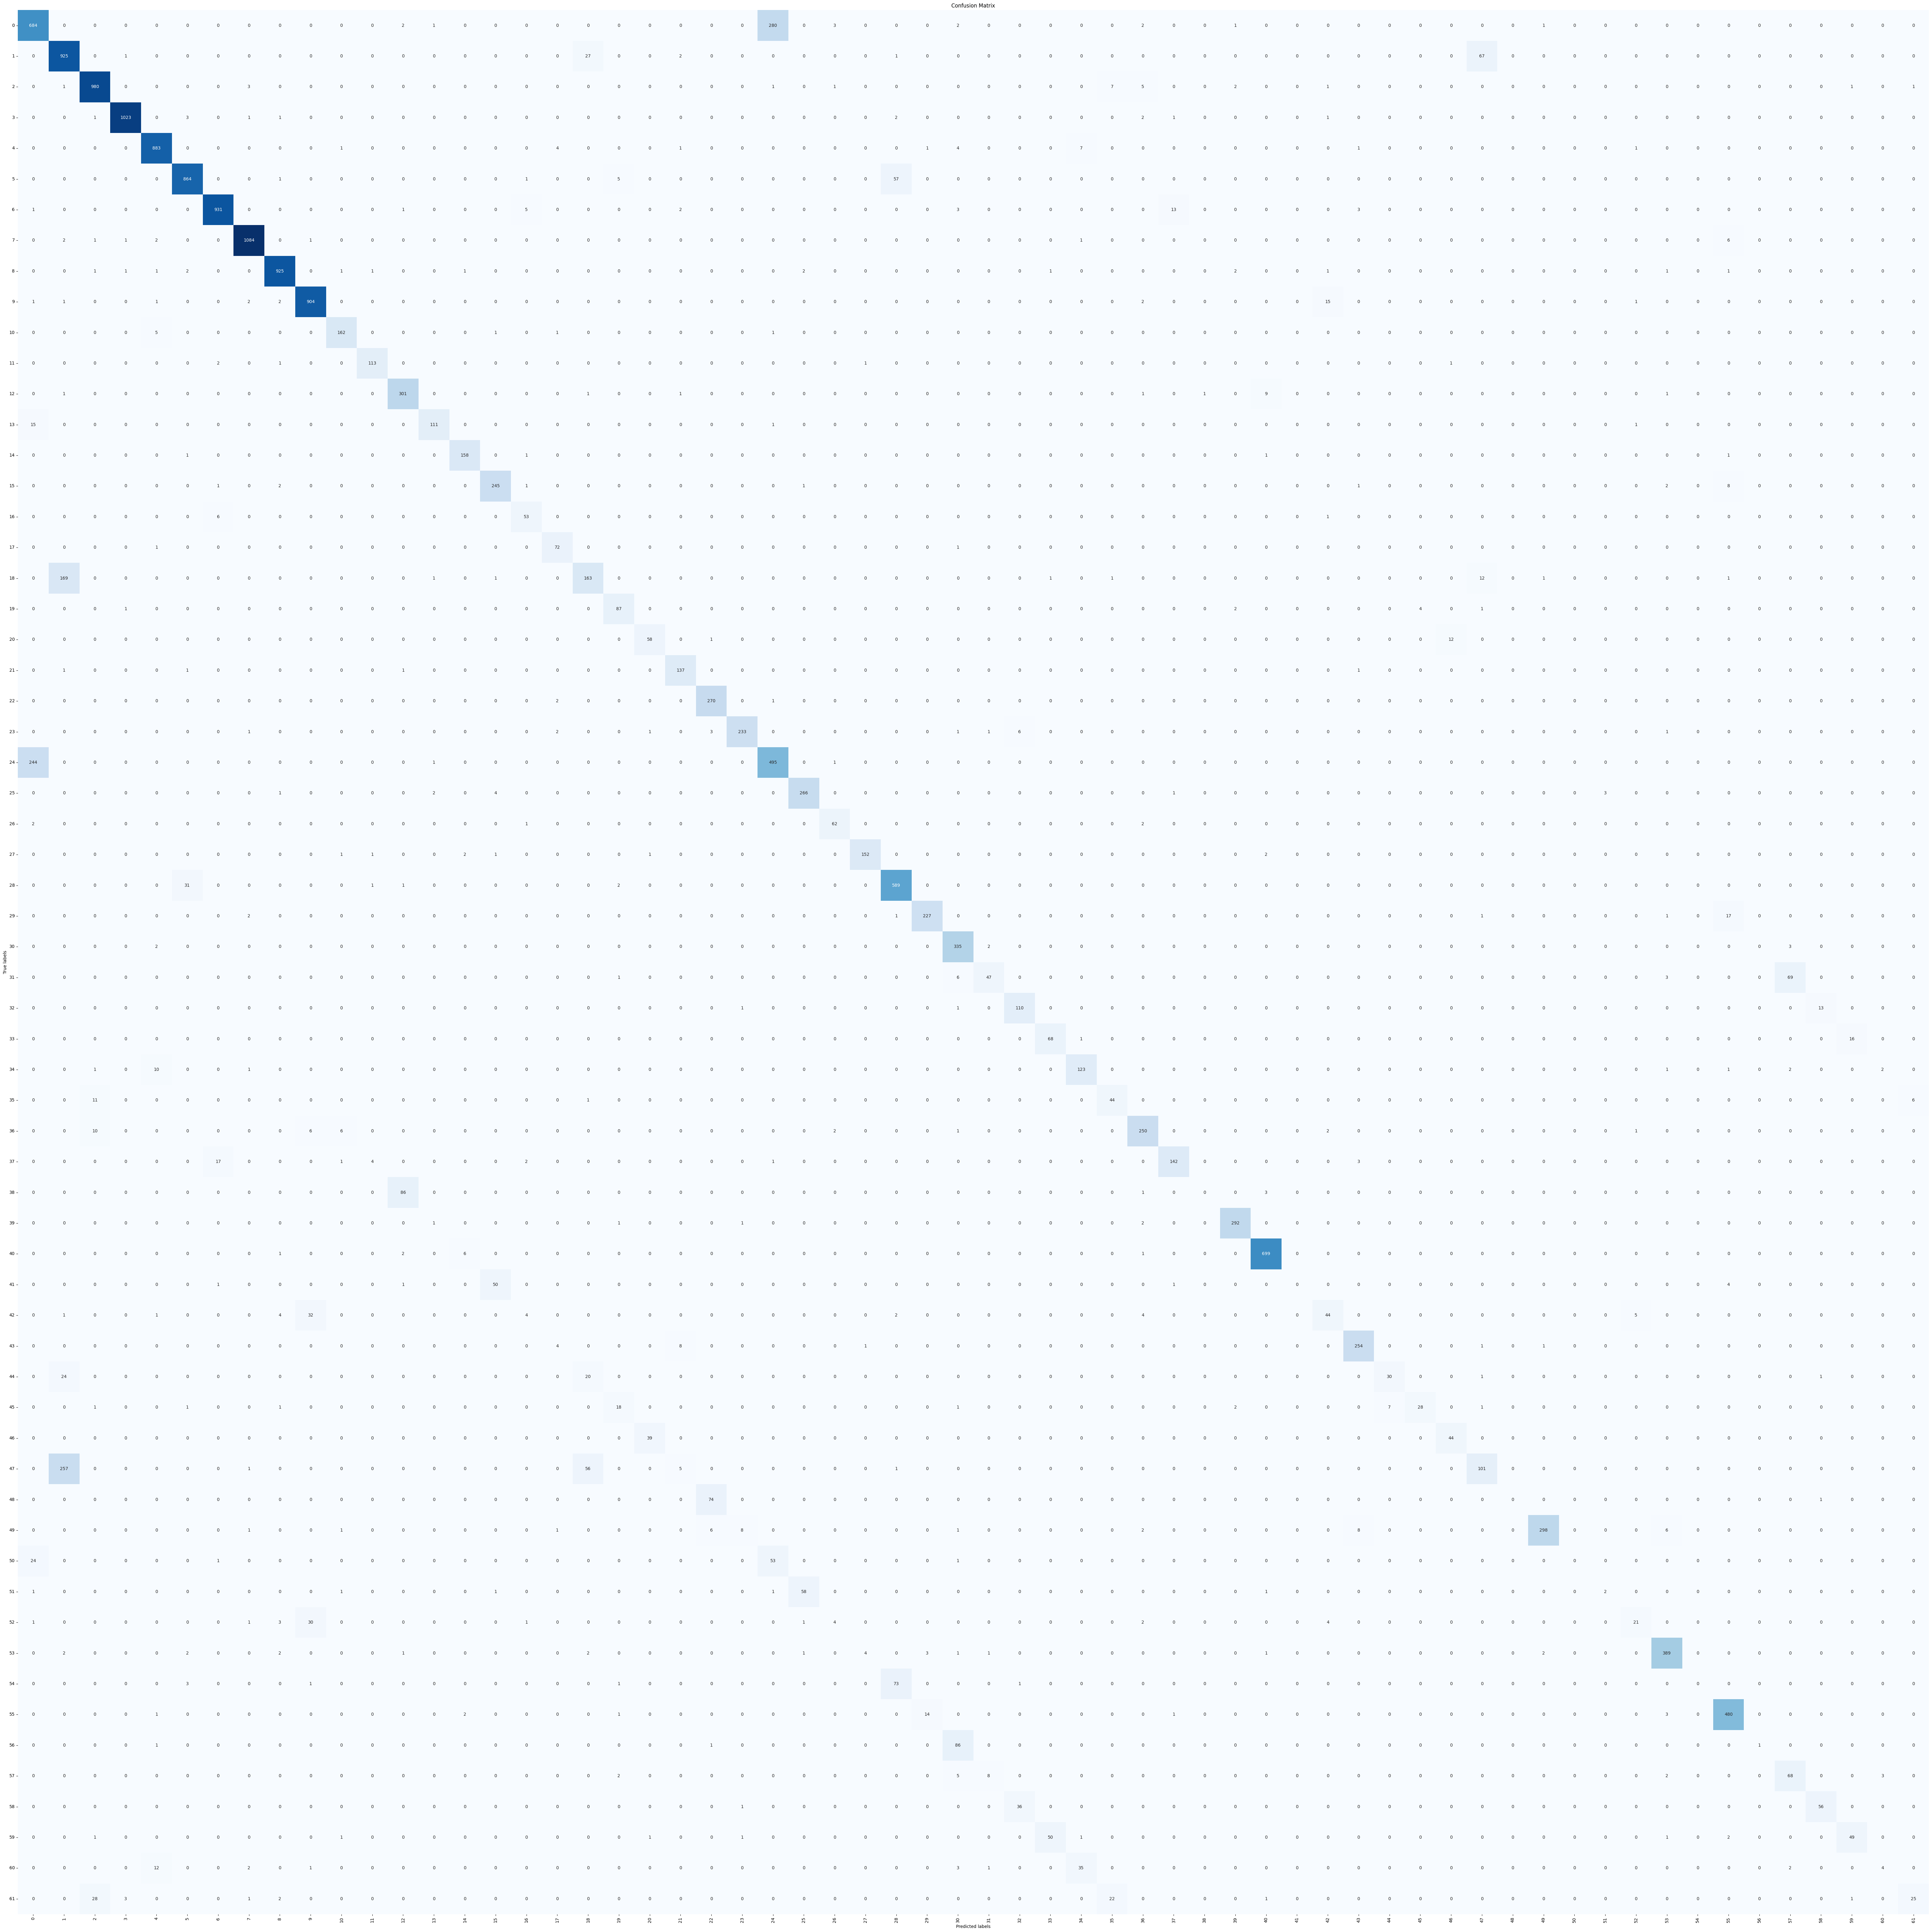

In [103]:
plot_confusion_matrix(y_test, VGG_pred)

### 2. Lenet-5

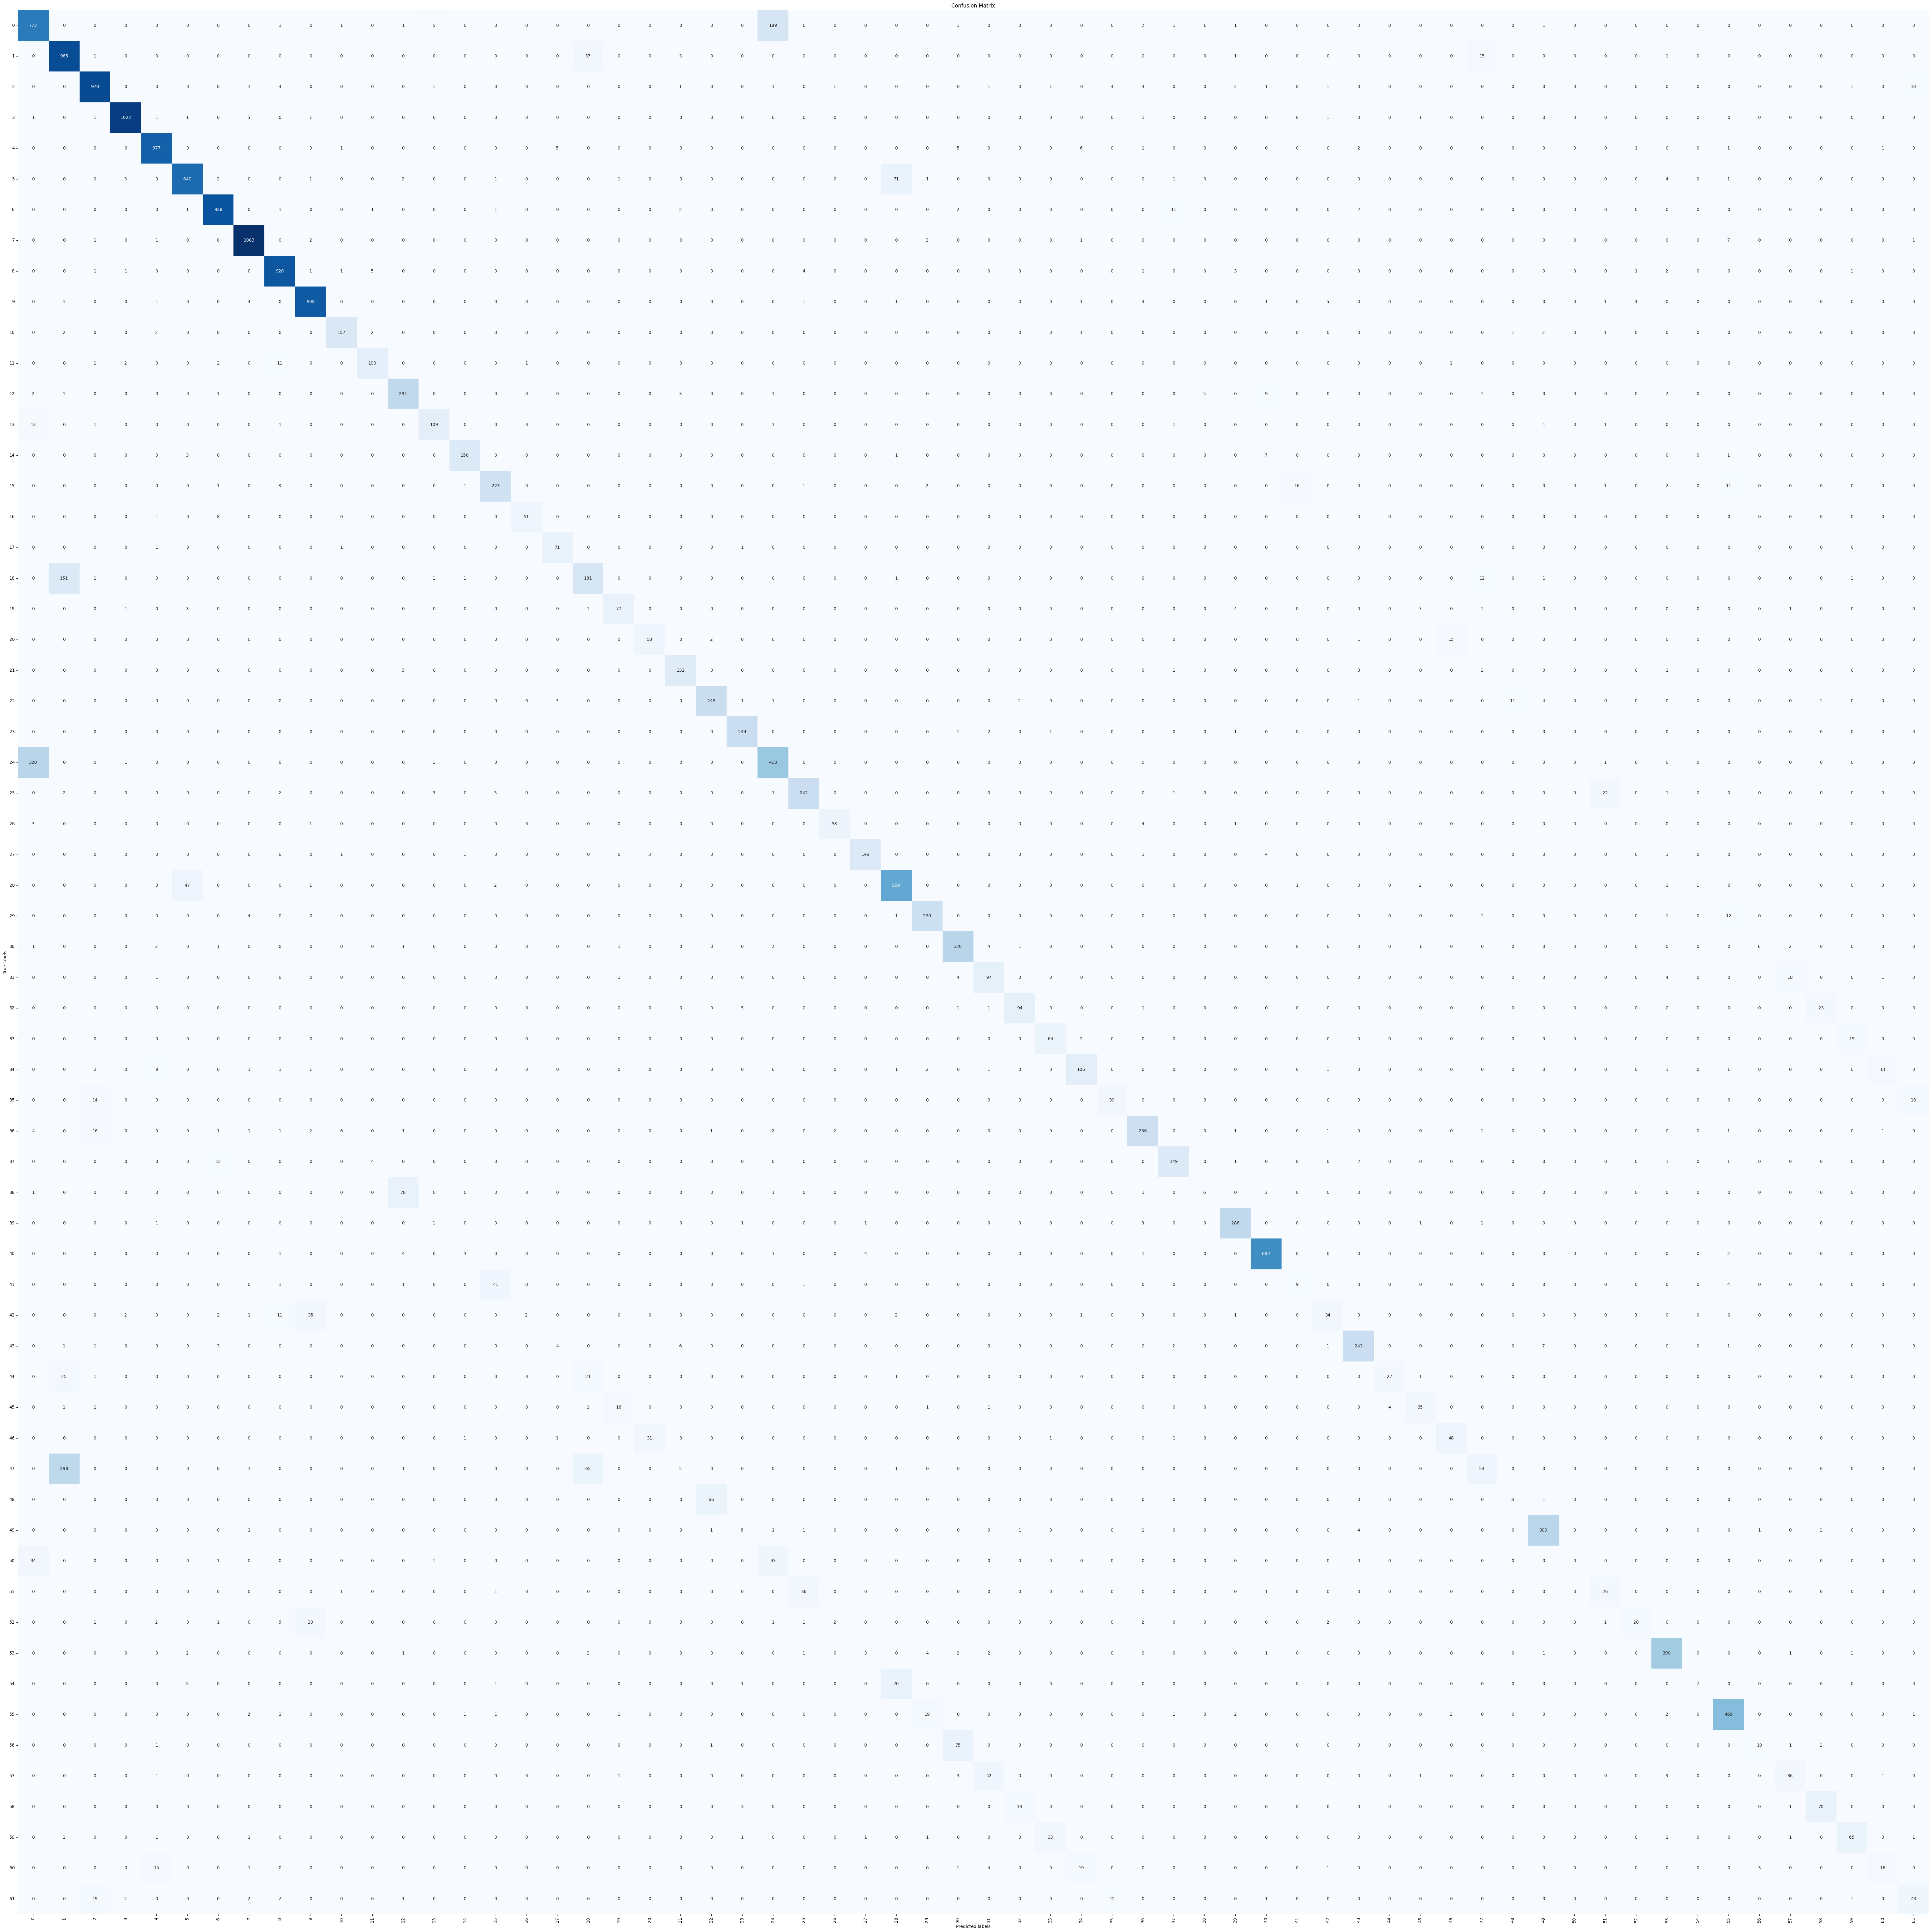

In [104]:
plot_confusion_matrix(y_test, predicted_labels_lenet)

### 3. MLP

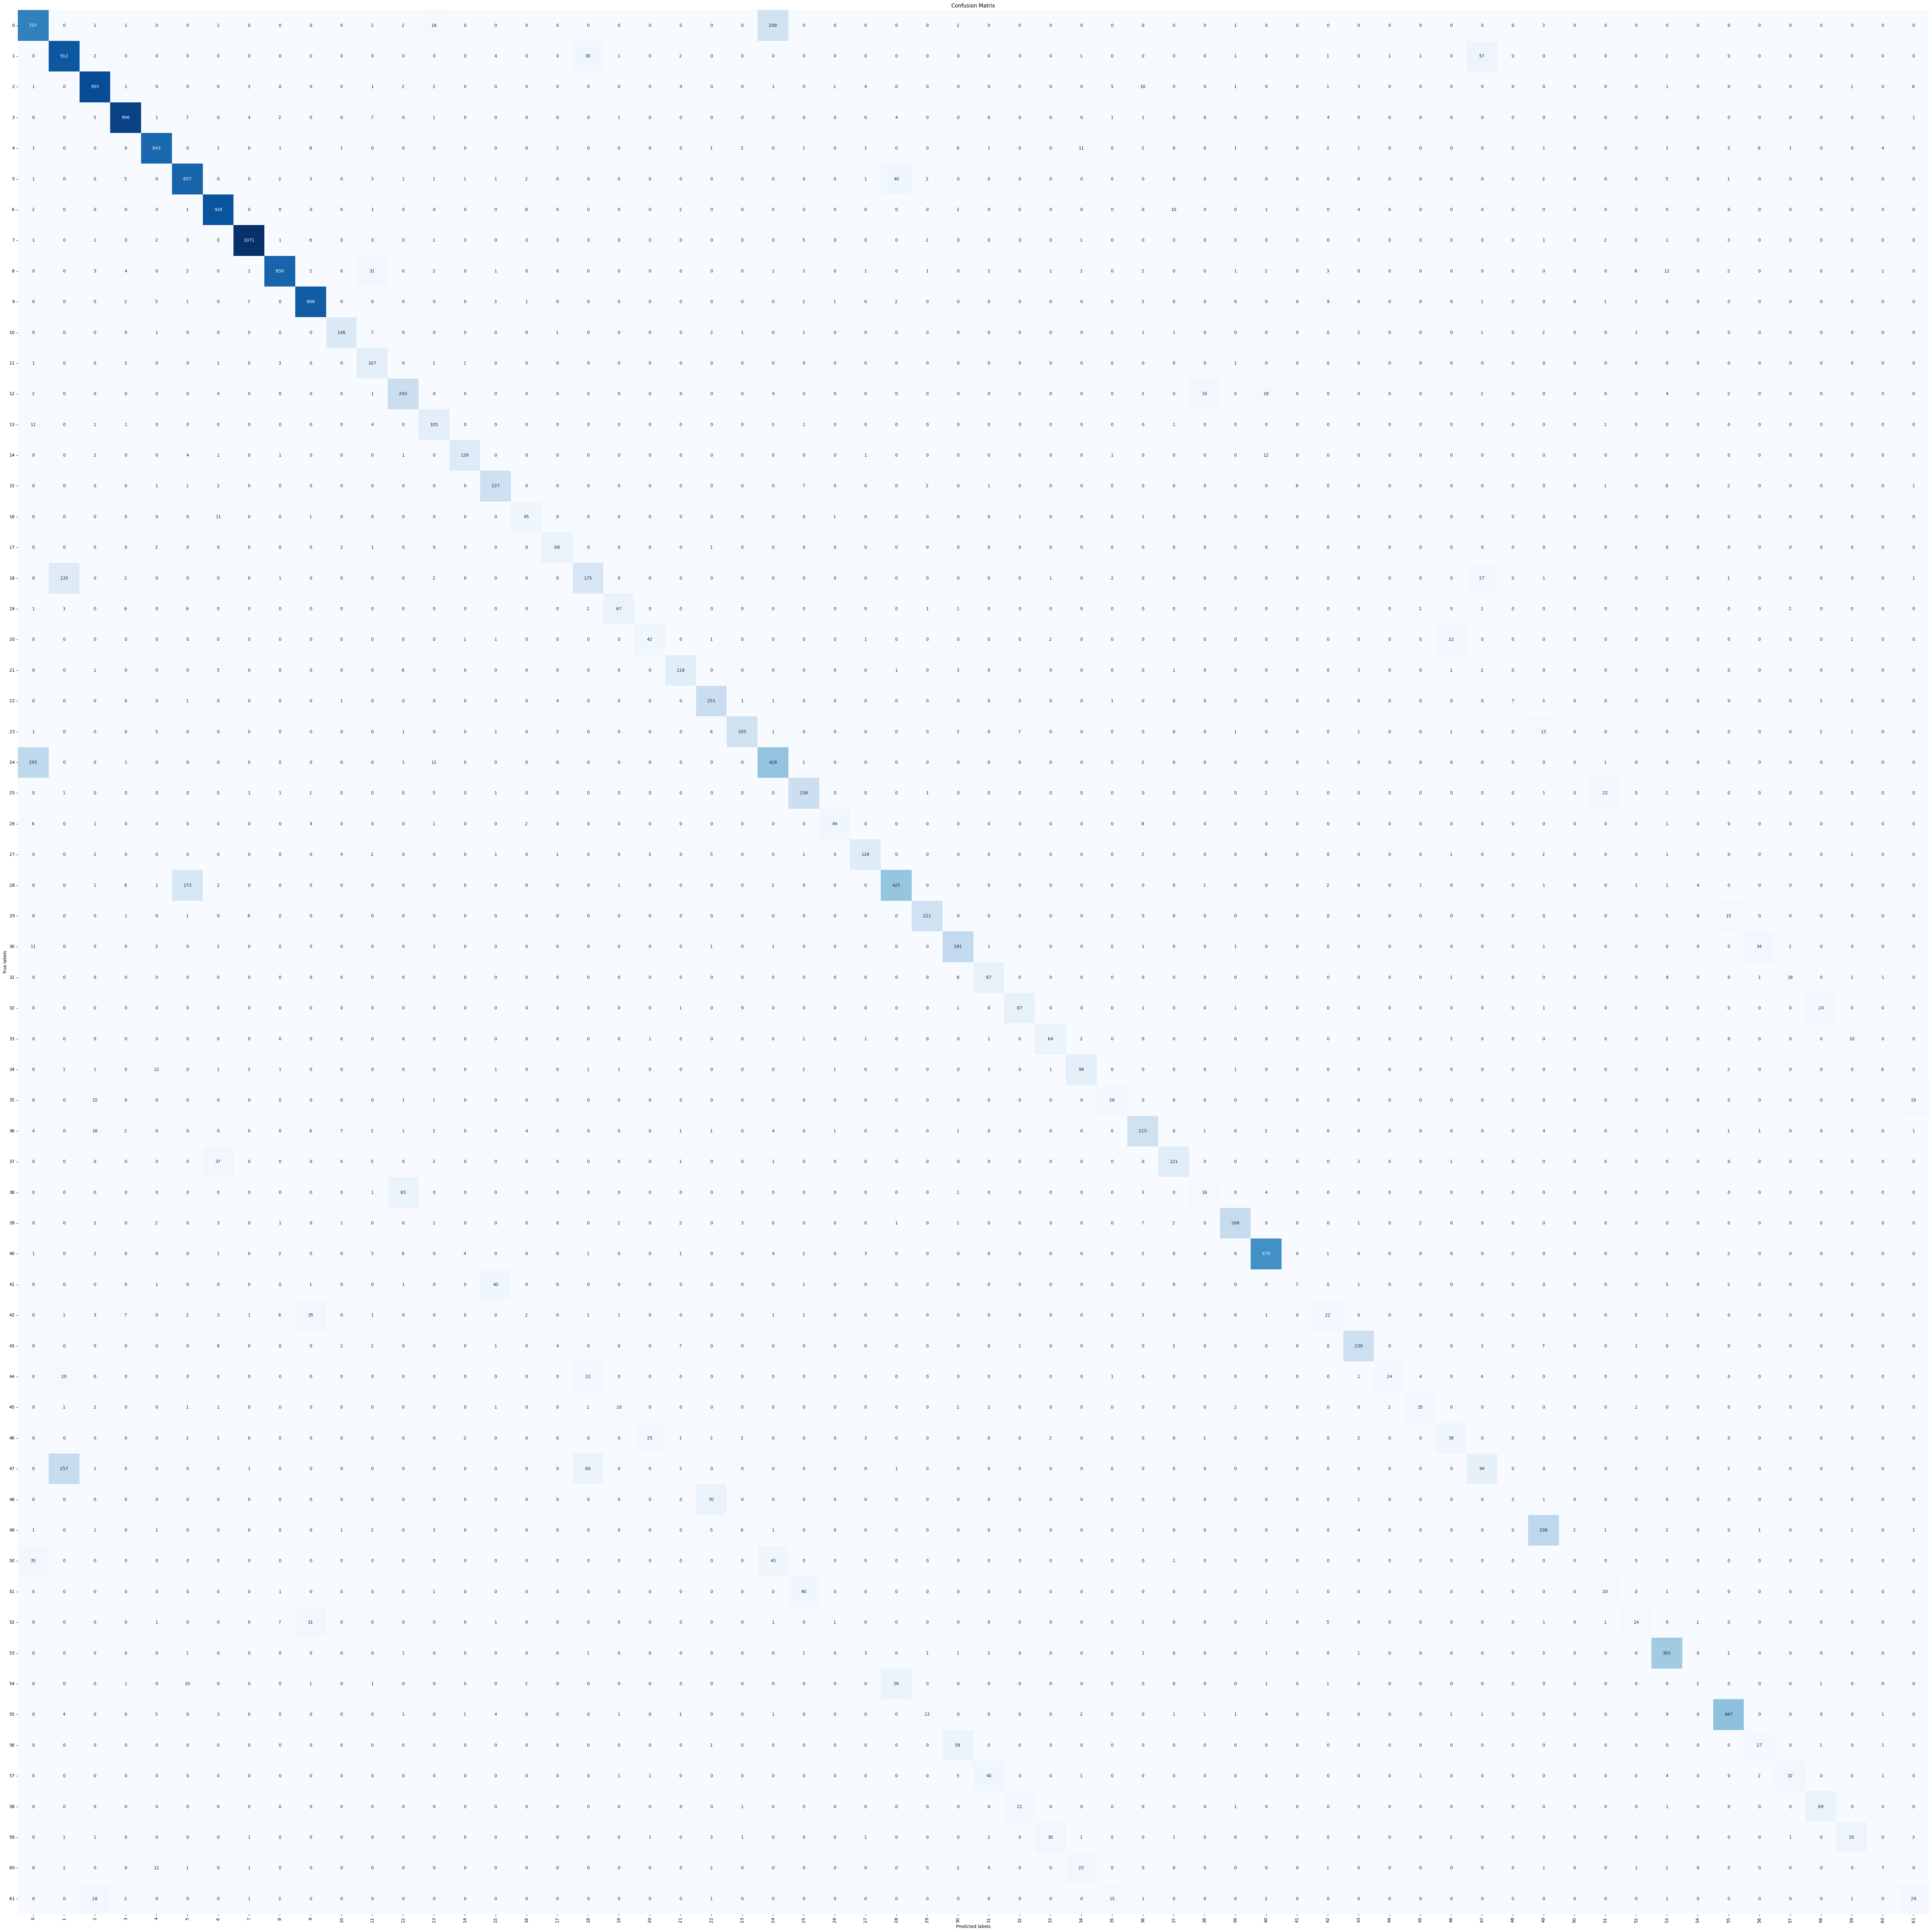

In [105]:
plot_confusion_matrix(y_test, mlp_pred)

# 5. Comparison

## 1. Weighted F1 of three models

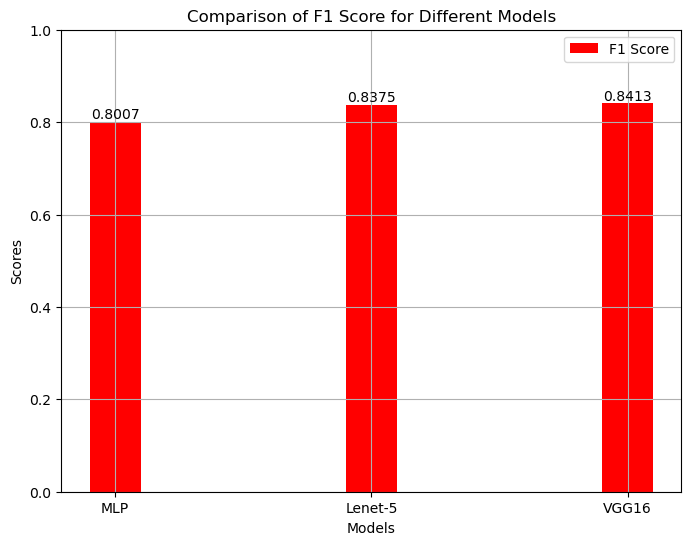

In [9]:

models = ['MLP', 'Lenet-5', 'VGG16']
f1_scores = [0.8007, 0.8375, 0.8413]


plt.figure(figsize=(8, 6))

plt.bar(models, f1_scores, color='red', label='F1 Score', width = 0.2)

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Comparison of F1 Score for Different Models')
plt.legend()

for i, f1_score in enumerate(f1_scores):
    plt.text(models[i], f1_score, str(f1_score), ha='center', va='bottom')
plt.ylim(0, 1)
plt.grid(True)
plt.show()

## 2. F1 scores in different classes comparison

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

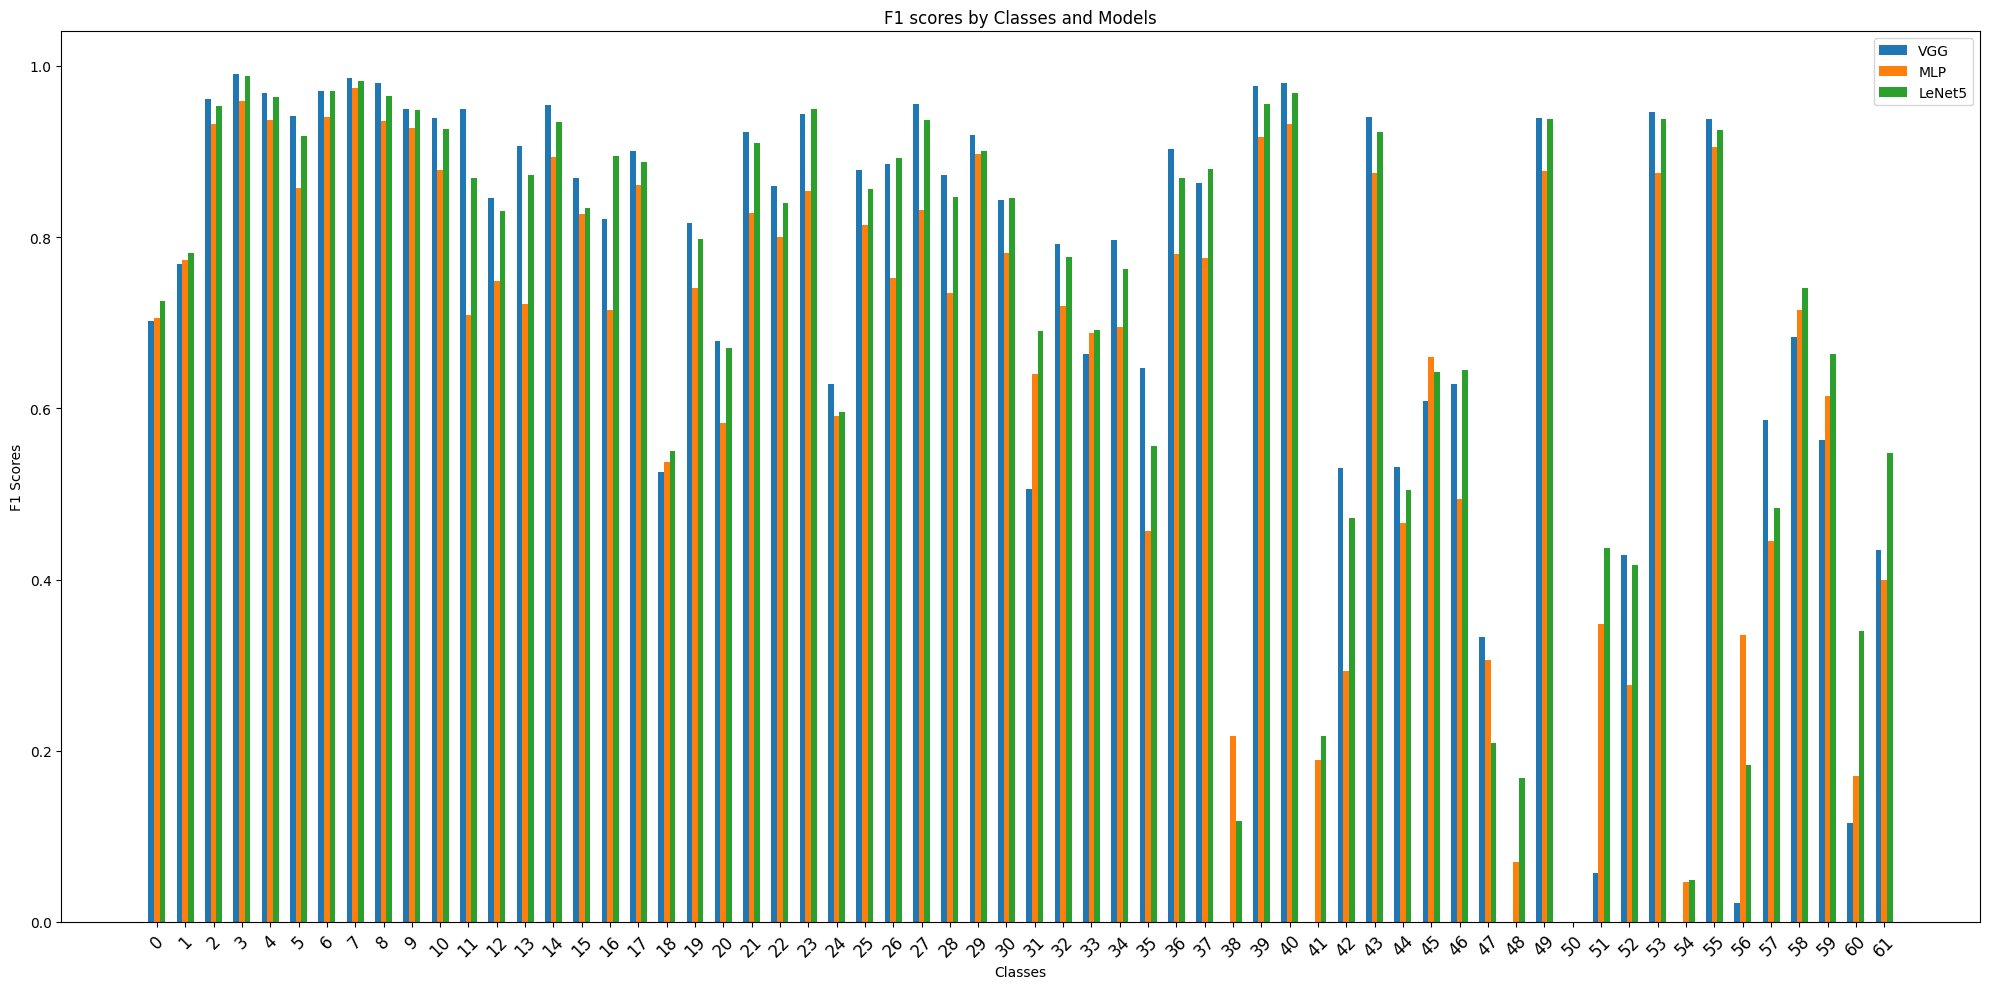

In [111]:
from sklearn.metrics import classification_report
report_vgg = classification_report(y_test, VGG_pred, output_dict=True)
report_mlp = classification_report(y_test, mlp_pred, output_dict=True)
report_lenet5 = classification_report(y_test, predicted_labels_lenet, output_dict=True)

f1_scores_vgg = [v['f1-score'] for k, v in report_vgg.items() if k.isnumeric()]
f1_scores_mlp = [v['f1-score'] for k, v in report_mlp.items() if k.isnumeric()]
f1_scores_lenet5 = [v['f1-score'] for k, v in report_lenet5.items() if k.isnumeric()]

x = np.arange(len(f1_scores_vgg))

fig, ax = plt.subplots(figsize=(20, 10))

bar_vgg = ax.bar(x - bar_width, f1_scores_vgg, bar_width, label='VGG')
bar_mlp = ax.bar(x, f1_scores_mlp, bar_width, label='MLP')
bar_lenet5 = ax.bar(x + bar_width, f1_scores_lenet5, bar_width, label='LeNet5')

ax.set_xlabel('Classes')
ax.set_ylabel('F1 Scores')
ax.set_title('F1 scores by Classes and Models')
ax.set_xticks(x)
ax.set_xticklabels(range(len(f1_scores_vgg)), fontsize=12)
ax.legend()

plt.xticks(rotation=45)

fig.tight_layout()

plt.show()

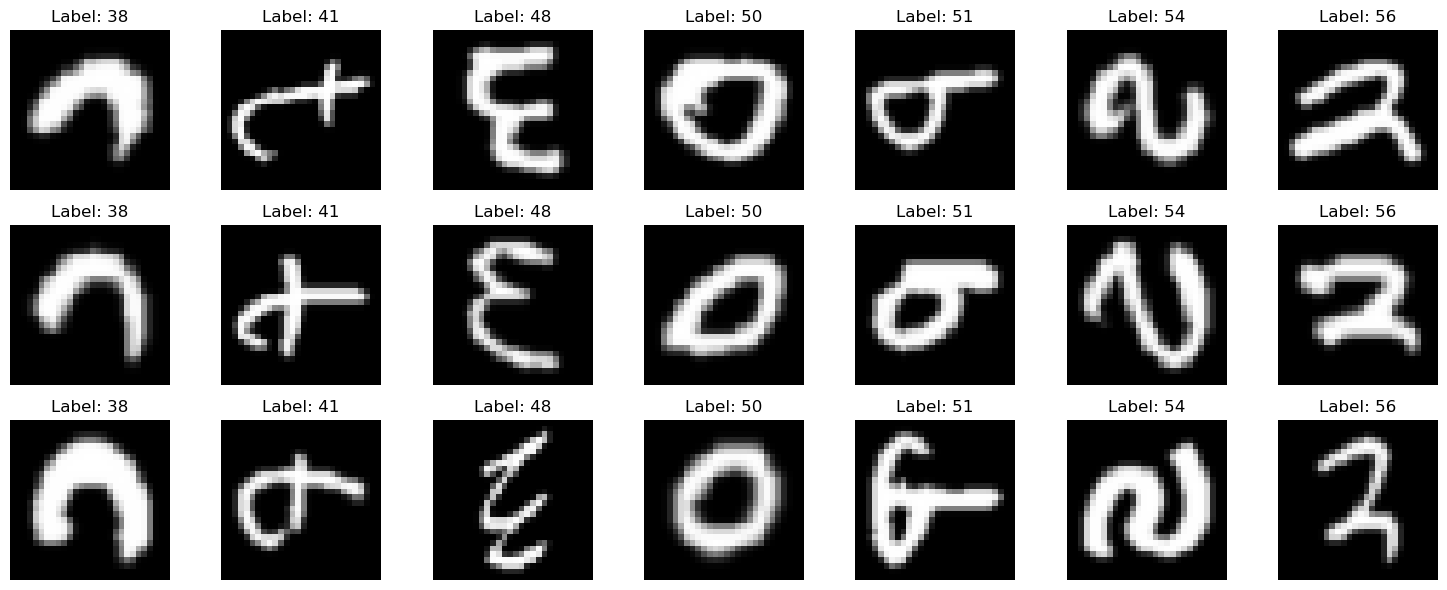

In [8]:
# show those images labels with low F1
indices = [38, 41, 48, 50, 51,54,56]
fig, axes = plt.subplots(3, 7, figsize=(15, 6))

assert all((y_test == label).sum() >= 3 for label in indices)
for i, row in enumerate(axes):
    for ax, label in zip(row, indices):
        image_idx = np.where(y_test == label)[0][i] 
        ax.imshow(X_test[image_idx], cmap='gray')
        ax.set_title(f'Label: {label}')
        ax.axis('off')

plt.tight_layout()
plt.show()